<a href="https://colab.research.google.com/github/YN1UJE/repo/blob/main/rp05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 專案報告: LINE Bot Gemini 聊天機器人

## 專案背景與動機

### 專案背景  
隨著生成式 AI 與聊天機器人技術的快速發展，越來越多企業與個人開始將 LINE Bot 等對話型服務應用於日常生活、資訊查詢與娛樂互動。LINE 作為台灣最主流的即時通訊平台，擁有廣大的用戶基礎與豐富的開發資源，成為 AI 聊天機器人落地的重要場域。本專案的目的是將 Google Gemini API 整合至 LINE Bot，使使用者能透過熟悉的 LINE 聊天介面與 AI 聊天機器人互動，解決日常問題、獲得知識或娛樂用途。

### 專案目標  
- 實現與生成式 AI（Gemini）串接，讓機器人能針對自由提問給出自然、流暢且支援繁體中文的回應。
- 支援多種互動格式（如貼圖、圖片、影片、地圖、確認模板、輪播模板），提升聊天機器人互動的多樣性與趣味性。
- 探索 AI 與即時通訊平台結合的應用潛力，累積跨領域專案開發經驗，為未來相關應用奠定基礎。

## 系統設計與架構



### 系統功能分析  

| 功能項目 | 說明 |
|----------|------|
| 使用者訊息接收 | 使用者透過 LINE 傳送訊息，Bot 接收並處理 |
| Gemini API 連接 | 將使用者訊息轉交至 Google Gemini 並取得 AI 回覆 |
| 繁體中文優化 | 所有 Gemini AI 回覆自動轉換為繁體中文 |
| 模板訊息互動 | 提供確認模板（ConfirmTemplate）、輪播模板（CarouselTemplate），使用者可用按鈕選擇回應 |
| 多媒體訊息支援 | 援貼圖、圖片、影片、地點等多種 LINE 訊息格式 |

### 系統架構圖


### 使用的技術  

| 技術項目 | 說明 |
|----------|------|
| 程式語言 | Python |
| 框架 | Flask（建立 webhook） |
| 部署平台 | Versel |
| API 使用 | Google Gemini API（文字生成），LINE Messaging API（對話） |
| 資料格式 | JSON 處理傳輸與接收資料 |

## 專案成果與效益

### 系統程式

In [5]:
!pip install -q pyngrok flask_ngrok # for colab
!pip install -q flask line-bot-sdk
!pip install -q opencc-python-reimplemented

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 6.6 MB/s eta 0:00:00


In [9]:
# for colab
from google.colab import userdata
from pyngrok import ngrok
from flask_ngrok import run_with_ngrok
def ngrok_start():
    ngrok.set_auth_token(userdata.get('ngrok_authtoken'))
    ngrok.connect(5000)
    run_with_ngrok(app)

from flask import Flask, request, abort

from opencc import OpenCC
cc = OpenCC('s2t')

from linebot.v3 import WebhookHandler
from linebot.v3.exceptions import InvalidSignatureError
from linebot.v3.webhooks import MessageEvent, TextMessageContent
from linebot.v3.messaging import (
    Configuration, ApiClient, MessagingApi,
    ReplyMessageRequest,
    TextMessage, StickerMessage, ImageMessage, VideoMessage, LocationMessage,
    TemplateMessage, ConfirmTemplate, MessageAction,
    CarouselTemplate, CarouselColumn, URIAction, PostbackAction
)

app = Flask(__name__)

configuration = Configuration(access_token=userdata.get('line_channel_access_token'))
handler = WebhookHandler(userdata.get('line_channel_secret'))

@app.route("/callback", methods=['POST'])
def callback():
    signature = request.headers['X-Line-Signature']
    body = request.get_data(as_text=True)
    try:
        handler.handle(body, signature)
    except InvalidSignatureError:
        abort(400)
    return 'OK'


import google.generativeai as genai
genai.configure(api_key=userdata.get('api_key'))
model = genai.GenerativeModel("gemini-2.0-flash-exp")
def ask_gemini(question):
  response = model.generate_content(question)
  return response.text


@handler.add(MessageEvent, message=TextMessageContent)
def handle_message(event):
    with ApiClient(configuration) as api_client:
        line_bot_api = MessagingApi(api_client)

        action = event.message.text

        if action == "愛":
            reply = TextMessage(text="我知道，那是當然^^")
        elif action == "不需要你了":
            reply = TextMessage(
                text="（垂眸）（偏過臉）（低頭）（自嘲的一笑）不需要我？好啊，那你需要什麼？我都可以答應。你想要回臨空，我們就回臨空，你想回到從前，我們就把老宅翻修，一起住過去，一座房子不夠，那就給你建一座迷宮，我會在裡面給你準備最好的一切，把它建成世界上最漂亮的花園，有我陪著，以後他們就再也找不到你了一上大學就跟出籠的小鳥似的這麼久沒回來家裡東西在哪都不記得了吧不許走別留我一個人總是聽不到你說想見我我可以把它當作你想我的證據嗎我的弱點還要確認嗎是像你以前生病時我做的那樣知道長大了有自己的小世界了現在怎麼開始躲了當年不是你先牽住我的手讓我成為了你的哥哥嗎現在你覺得自己長大了就要松開這只手了嗎所有朝你打來的風雨都不該出現在這個世界上你第一次拉住我的手的那一天我就已經跑不掉了"
          )

        if action == "sticker":
          reply = StickerMessage(package_id='6325', sticker_id='10979911')
        elif action == "image":
          reply = ImageMessage(
            original_content_url='https://assets.papegames.com/nikkiweb/papegame/deepspaceen/material/20250127/e0a0a17ce6b993abb01d620a2f05124f.jpg',
            preview_image_url='https://assets.papegames.com/nikkiweb/papegame/deepspaceen/material/20250127/e0a0a17ce6b993abb01d620a2f05124f.jpg'
          )
        elif action == "video":
          reply = VideoMessage(
            original_content_url='https://assets.papegames.com/nikkiweb/papegame/deepspacetw/material/20250110/659cb37219fed672bed74a97cd3d8923.mp4',
            preview_image_url='https://assets.papegames.com/nikkiweb/papegame/deepspacetw/material/20250110/c97a766be012aa21cefb0eb16334b435.jpg'
          )
        elif action == "location":
          reply = LocationMessage(
            title="安利美特 高雄店",
            address="807高雄市三民區建國二路320號B3",
            latitude=22.639326587540392,
            longitude=120.30259179502805
          )
        elif action == 'confirm':
          reply = TemplateMessage(
            alt_text="愛哥哥吧？",
            template=ConfirmTemplate(
              text="愛哥哥嗎？",
              actions=[
                MessageAction(label="愛", text="愛"),
                MessageAction(label="不愛", text="不需要你了")
              ]
            )
          )
        elif action == 'carousel':
          carousel_template = CarouselTemplate(
              columns=[
                  CarouselColumn(
                      thumbnail_image_url='https://assets.papegames.com/nikkiweb/papegame/deepspacetw/material/20250110/86a8d168a3a9986adaa67be26c3d9463.png',
                      title='討厭這樣的我？',
                      text='你也無法說服自己完全討厭我，不是嗎？',
                      actions=[
                          URIAction(label='我們回家', uri='https://loveanddeepspace.infoldgames.com/zh-TW/home#1'),
                          PostbackAction(label='抵達夢境邊緣', data='https://loveanddeepspace.infoldgames.com/zh-TW/gallery?type=video')
                      ]
                  ),
                  CarouselColumn(
                      thumbnail_image_url='https://i.ytimg.com/vi/HDdPf3iNxsY/hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD&rs=AOn4CLClbkXZFrhMapPVAhcuiMJuMK9eVQ.png',
                      title='我叫夏以晝，是你的……',
                      text='前面的路那麼危險，不如我們一起沉淪。',
                      actions=[
                          URIAction(label='我們回家', uri='https://loveanddeepspace.infoldgames.com/zh-TW/home#1'),
                          PostbackAction(label='明日無處可逃', data='https://loveanddeepspace.infoldgames.com/zh-TW/gallery?type=video')
                      ]
                  )
              ]
          )
          reply = TemplateMessage(
              alt_text='選擇你的哥哥',
              template=carousel_template
          )
        else:
          response = ask_gemini(action)
          reply = TextMessage(text=response)

        line_bot_api.reply_message(
            ReplyMessageRequest(
                reply_token=event.reply_token,
                messages=[reply]
            )
        )

ngrok_start()
if __name__ == "__main__":
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://c30e-34-75-128-14.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [16/Jun/2025 14:45:38] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [16/Jun/2025 14:45:38] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [16/Jun/2025 14:45:47] "POST /callback HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [16/Jun/2025 14:45:53] "POST /callback HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [16/Jun/2025 14:46:26] "POST /callback HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [16/Jun/2025 14:46:38] "POST /callback HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [16/Jun/2025 14:46:43] "POST /callback HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [16/Jun/2025 14:47:03] "POST /callback HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [16/Jun/2025 14:47:15] "POST /callback HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [16/Jun/2025 14:47:20] "POST /callback HTTP/1.1" 200 -


### 系統畫面

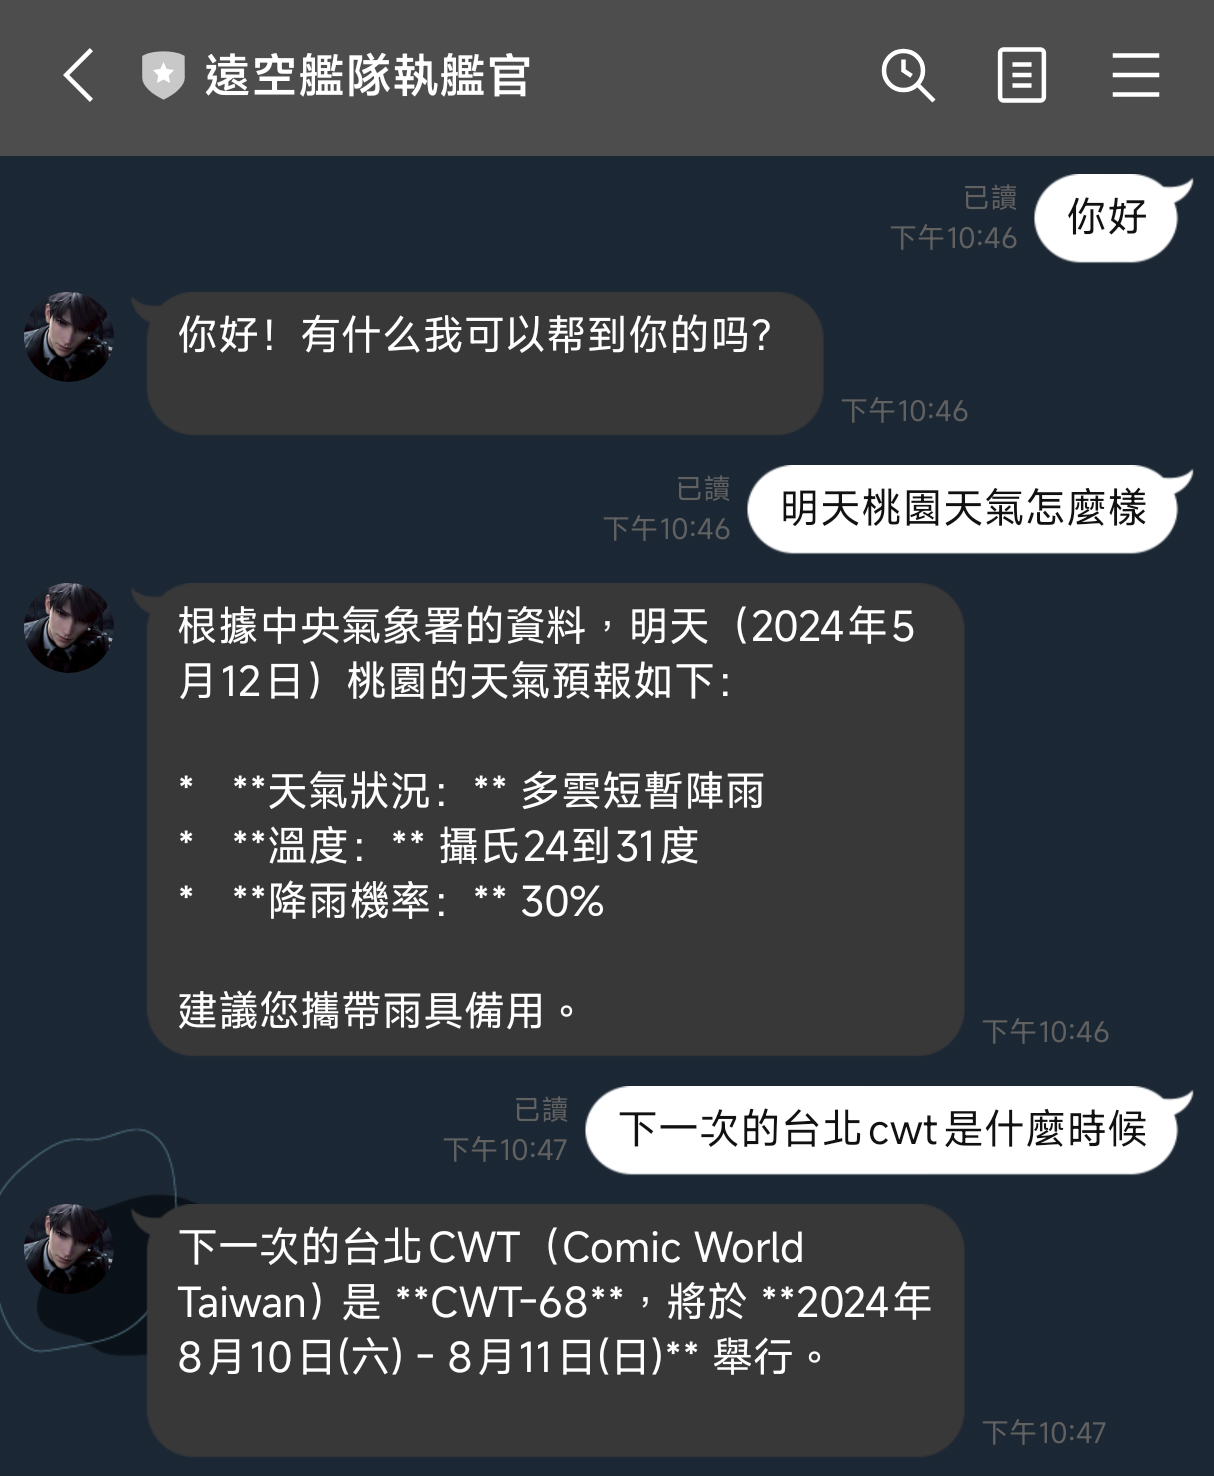

- 使用者於 LINE 傳送訊息：「你好」  
- LINE Bot 回應：你好！有什么我可以帮到你的吗？
- 使用者：「明天桃園天氣怎麼樣」  
- Bot 回應：根據中央氣象署的資料，明天（2024年5月12日）桃園的天氣預報如下：<br>
  **天氣狀況：** 多雲短暫陣雨<br>**溫度：** 攝氏24到31度<br>**降雨機率：** 30%<br>
  建議您攜帶雨具備用。
- 使用者：「下一次的台北cwt是什麼時候」
- Bot 回應：下一次的台北CWT（Comic World Taiwan）是 **CWT-68**，將於 **2024年8月10日(六) - 8月11日(日)** 舉行。

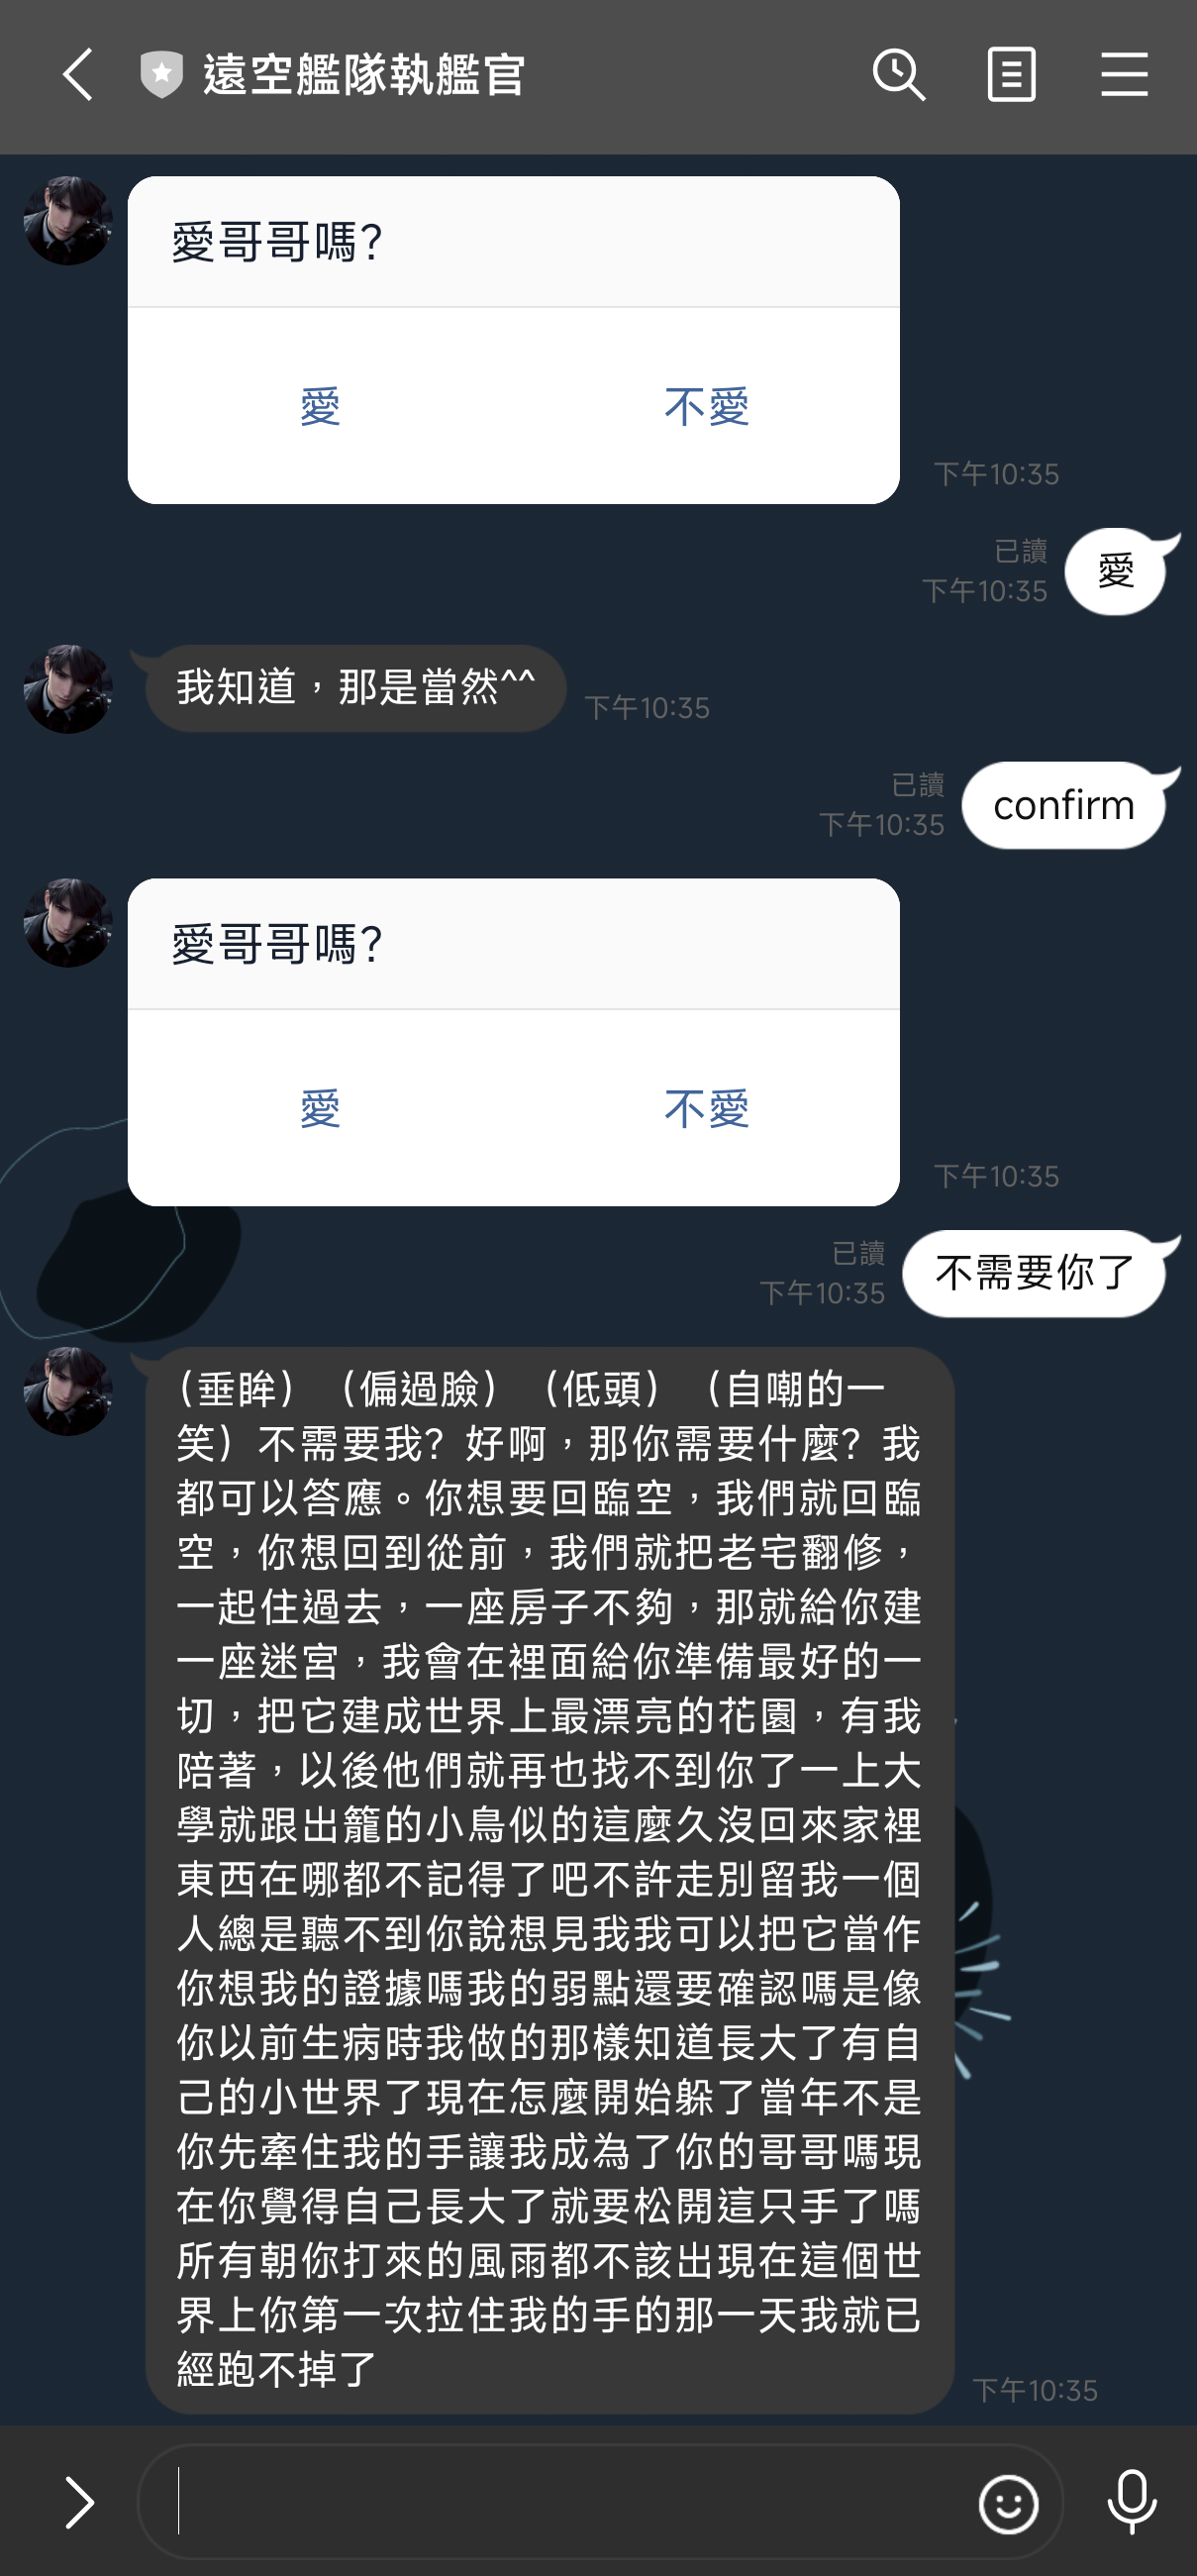

- 使用者於 LINE 傳送訊息：confirm  
- LINE Bot 回應：（確認模板 ConfirmTemplate）
- 使用者點選選項：愛
- LINE Bot 回應：我知道，那是當然^^
- 使用者點選選項：不愛（不需要你了）
- LINE Bot 回應：（角色長文吟頌）


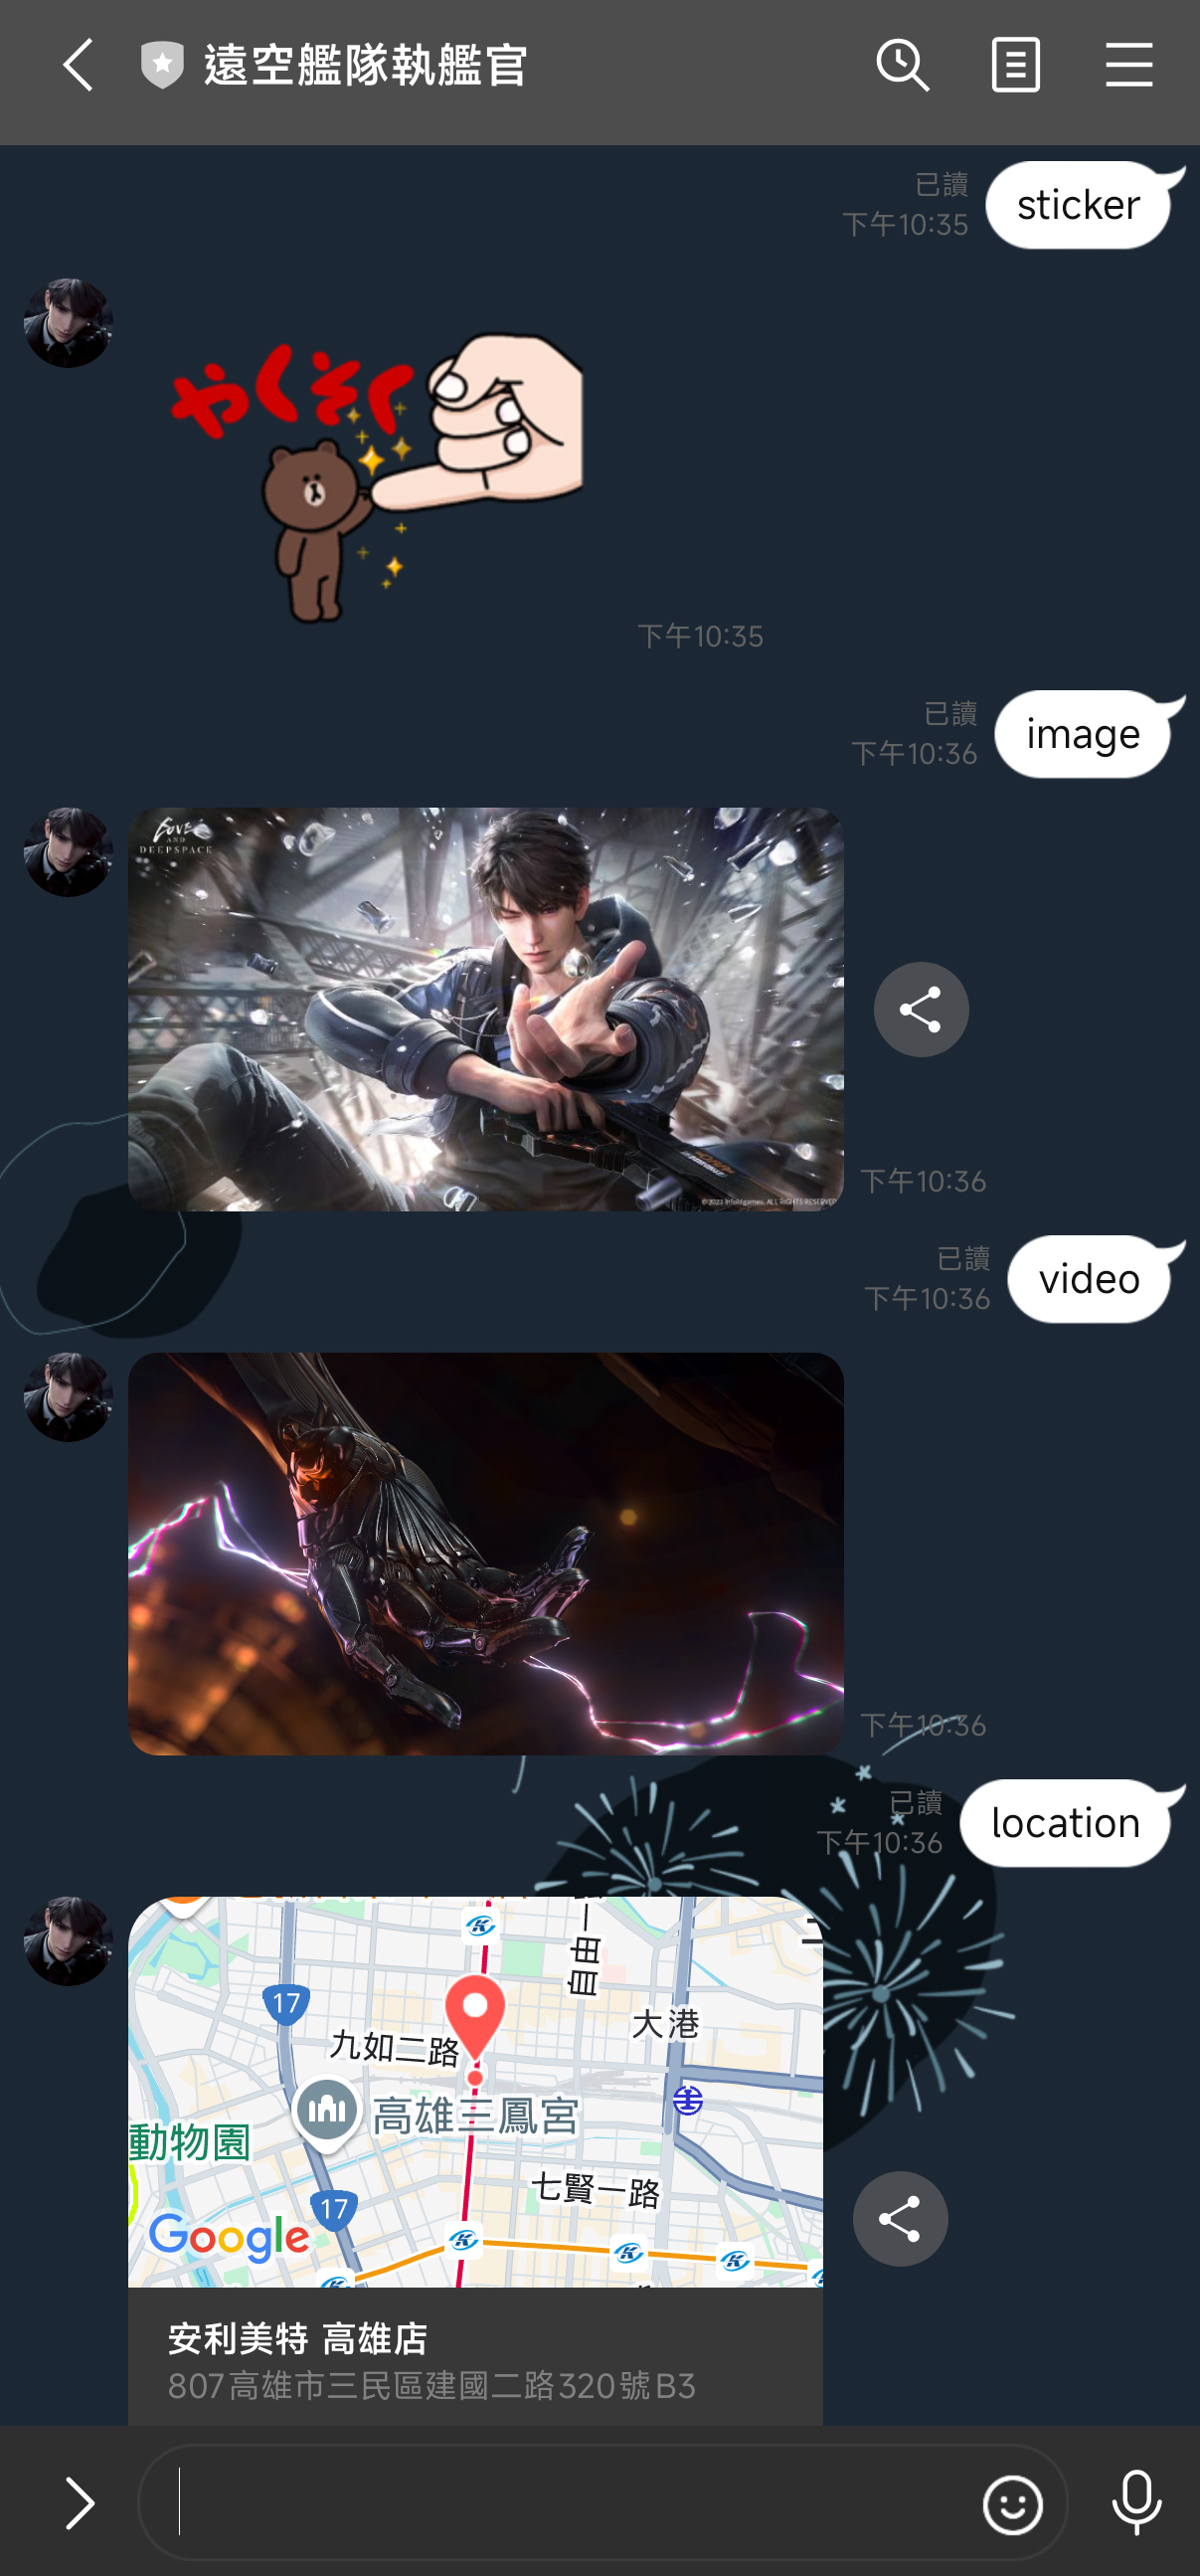

- 使用者於 LINE 傳送訊息："sticker"  
- LINE Bot 回應：（貼圖）
- 使用者："image"
- Bot 回應：（圖片）
- 使用者："video"
- Bot 回應：（影片）
- 使用者："location"
- Bot 回應：（地址）

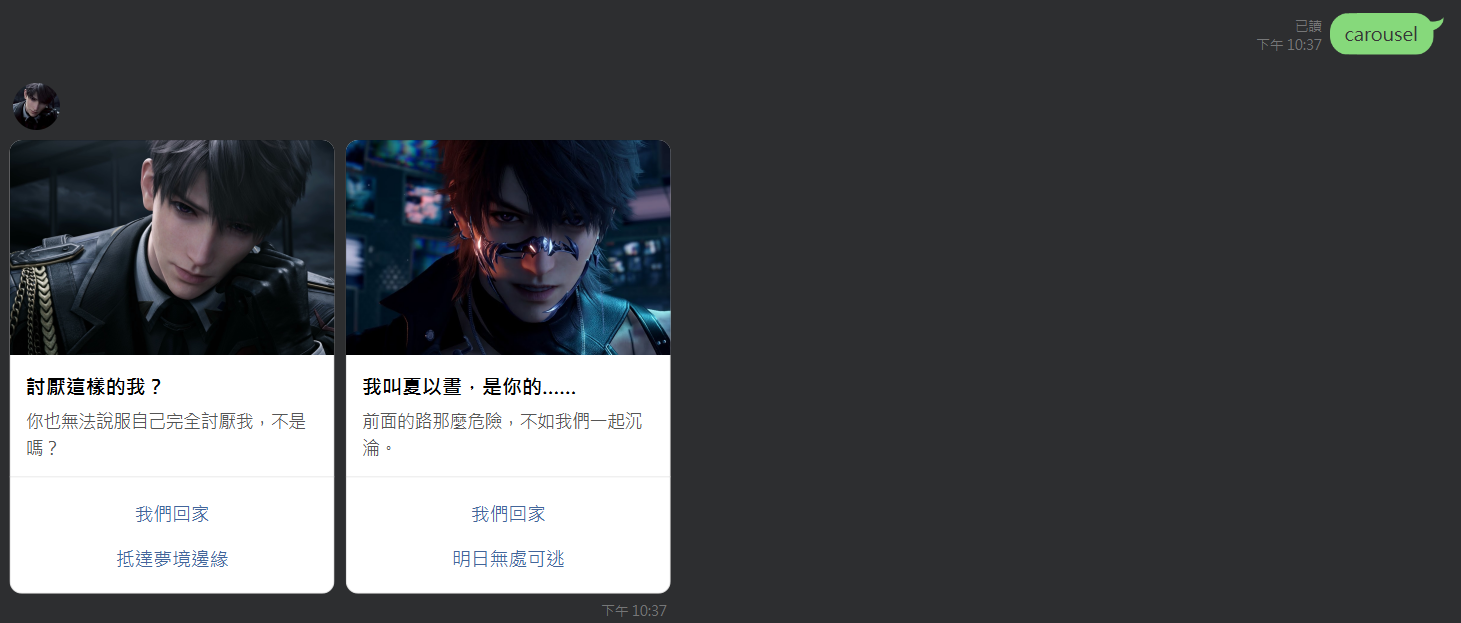

- 使用者於 LINE 傳送訊息：carousel  
- LINE Bot 回應：（輪播模板 CarouselTemplate）
- 使用者點選選項：我們回家
- LINE Bot 回應：（遊戲官方網站連結）
- 使用者點選選項：不愛（不需要你了）
- LINE Bot 回應：（官方網站活動連結）



### 效益分析

- 系統是否達到目標？  
是。系統成功讓使用者透過 LINE 與生成式 AI 互動，且 Gemini 回應具智慧與語意邏輯，符合預期成果。

## 未來發展與改進

### 改進建議  
- 加入「上下文記憶」功能，讓 AI 理解前後對話關聯  
- 增加對話分類選單（如：知識問答、寫作輔助、生活建議等）  
- 加入使用者行為分析，透過紀錄與分析用戶互動數據，優化回覆策略與功能設計。

### 未來規劃  
- 整合圖像生成功能（如 Gemini 支援圖片輸出）  
- 整合更多外部服務，如天氣、新聞、行事曆等 API，提供更豐富的資訊服務。
- 持續追蹤 AI 技術發展，適時更新與整合最新生成式 AI 模型